In [12]:
from transformers import T5Tokenizer, T5Model
tokenizer = T5Tokenizer.from_pretrained('google/flan-t5-base')
model = T5Model.from_pretrained('google/flan-t5-base')
text = "African elephants are the largest animals walking the Earth. Their herds wander through 37 countries in Africa. They are easily recognized by their trunk that is used for communication and handling objects. And their large ears allow them to radiate excess heat. Upper incisor teeth develop into tusks in African elephants and grow throughout their lifetime. There are two species of African elephants—the savanna (or bush) elephant and the forest elephant."
encoded_input = tokenizer(text, return_tensors='pt')-
decoder_input_ids = tokenizer("Savanna elephants are larger than forest elephants, and their tusks curve outwards. In addition to being smaller, forest elephants are darker and their tusks are straighter and point downward. There are also differences in the size and shape of the skull and skeleton between the two species.", return_tensors="pt").input_ids
decoder_input_ids = model._shift_right(decoder_input_ids)
output = model(**encoded_input, decoder_input_ids=decoder_input_ids, output_hidden_states=True)

In [39]:
def plot_clusters(rgb, words):
    fig, ax = plt.subplots(figsize=(5, 2.5))
    colors = [mcolors.rgb2hex(rgb[i]) for i in range(len(token_texts))]

    words = token_texts
    y_pos = 0.9
    x_pos = 0.0
    max_word_length = max(len(word) for word in words)
    for word, color in zip(words, colors):
        if word == '<|begin_of_text|>':
            word = '<SoT>'
            y_pos -= 0.05
            x_pos = 0.0
            
        text_color = 'black' if sum(mcolors.hex2color(color)) > 1.3 else 'white'  # Choose text color based on background color
        txt = ax.text(x_pos, y_pos, word, color=text_color, fontsize=12, bbox=dict(facecolor=color, alpha=0.8, edgecolor='none', pad=2))
        txt_width = txt.get_window_extent().width / (fig.dpi * fig.get_size_inches()[0])  # Calculate the width of the text in inches
        
        x_pos += txt_width * 1.1 + 0.01  # Adjust the spacing between words
        
        if x_pos > 0.97:
            y_pos -= 0.15
            x_pos = 0.0

    # Remove the axis ticks and spines
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    plt.title("GPT-2 last hidden state spectral-tSNE 3D(10eig)")
    plt.tight_layout()
    plt.show()
    

def visualize_encoder_features(model, tokenizer, layer, text):
    encoded_input = tokenizer(text, return_tensors='pt')
    token_ids = encoded_input['input_ids']
    token_texts = [tokenizer.decode([token_id]) for token_id in token_ids[0]]
    
    output = model(**encoded_input, decoder_input_ids=decoder_input_ids, output_hidden_states=True)
    features = output.encoder_hidden_states[layer].squeeze(0)
    eigenvectors, eigenvalues = NCUT(num_eig=10).fit_transform(features)
    X_3d, rgb = rgb_from_tsne_3d(eigenvectors, perplexity=30)
    rgb = rgb.numpy()

    plot_clusters(rgb, token_texts)
   


def visualize_decoder_features(model, tokenizer, layer, text):
    encoded_input = tokenizer(text, return_tensors='pt')
    token_ids = encoded_input['input_ids']
    token_texts = [tokenizer.decode([token_id]) for token_id in token_ids[0]]
    
    output = model(**encoded_input, decoder_input_ids=decoder_input_ids, output_hidden_states=True)
    features = output.encoder_hidden_states[layer].squeeze(0)
    eigenvectors, eigenvalues = NCUT(num_eig=10).fit_transform(features)
    X_3d, rgb = rgb_from_tsne_3d(eigenvectors, perplexity=30)
    rgb = rgb.numpy()

    plot_clusters(rgb, token_texts)

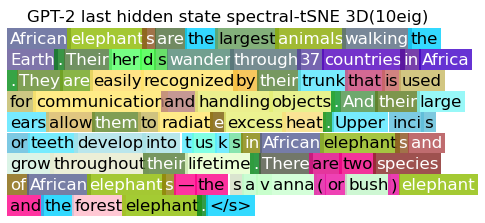

In [40]:
visualize_encoder_features(model, tokenizer, -1, text)

In [31]:
token_ids = encoded_input['input_ids']
token_texts = [tokenizer.decode([token_id]) for token_id in token_ids[0]]

In [14]:
output.keys()

odict_keys(['last_hidden_state', 'past_key_values', 'decoder_hidden_states', 'encoder_last_hidden_state', 'encoder_hidden_states'])

In [23]:
layer = -1
features = output.encoder_hidden_states[layer].squeeze(0)
print(features.shape, len(token_texts))

torch.Size([99, 768]) 99


In [24]:
import sys, os
sys.path.append(os.path.join(os.path.dirname(sys.path[0]), 'ncut_pytorch'))
from ncut_pytorch import NCUT, rgb_from_tsne_3d

eigenvectors, eigenvalues = NCUT(num_eig=10).fit_transform(features)
X_3d, rgb = rgb_from_tsne_3d(eigenvectors, perplexity=30)
rgb = rgb.numpy()
print("X_3d shape:", X_3d.shape)
print("rgb shape:", rgb.shape)
print("token_texts length:", len(token_texts))

X_3d shape: (99, 3)
rgb shape: (99, 3)
token_texts length: 99


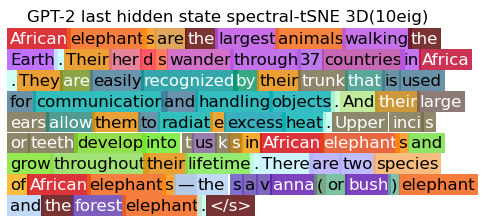

In [25]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots(figsize=(5, 2.5))

# Define the colors
colors = [mcolors.rgb2hex(rgb[i]) for i in range(len(token_texts))]

# Split the sentence into words
words = token_texts


y_pos = 0.9
x_pos = 0.0
max_word_length = max(len(word) for word in words)
for word, color in zip(words, colors):
    if word == '<|begin_of_text|>':
        word = '<SoT>'
        y_pos -= 0.05
        x_pos = 0.0

    
    text_color = 'black' if sum(mcolors.hex2color(color)) > 1.3 else 'white'  # Choose text color based on background color
    # text_color = 'black'
    txt = ax.text(x_pos, y_pos, word, color=text_color, fontsize=12, bbox=dict(facecolor=color, alpha=0.8, edgecolor='none', pad=2))
    txt_width = txt.get_window_extent().width / (fig.dpi * fig.get_size_inches()[0])  # Calculate the width of the text in inches
    
    x_pos += txt_width * 1.1 + 0.01  # Adjust the spacing between words
    
    if x_pos > 0.97:
        y_pos -= 0.15
        x_pos = 0.0
    # break
        
# Remove the axis ticks and spines
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title("GPT-2 last hidden state spectral-tSNE 3D(10eig)")
plt.tight_layout()
plt.show()

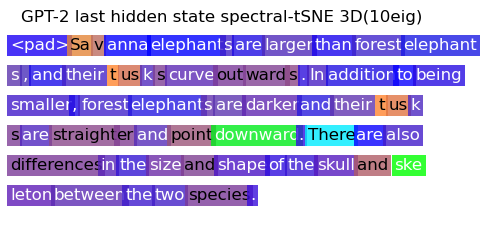

In [34]:
layer = -1
features = output.decoder_hidden_states[layer].squeeze(0)

eigenvectors, eigenvalues = NCUT(num_eig=10).fit_transform(features)
X_3d, rgb = rgb_from_tsne_3d(eigenvectors, perplexity=30)
rgb = rgb.numpy()

decoder_token_texts = [tokenizer.decode([token_id]) for token_id in decoder_input_ids[0]]
fig, ax = plt.subplots(figsize=(5, 2.5))
colors = [mcolors.rgb2hex(rgb[i]) for i in range(len(decoder_token_texts))]
words = decoder_token_texts

y_pos = 0.9
x_pos = 0.0
max_word_length = max(len(word) for word in words)
for word, color in zip(words, colors):
    if word == '<|begin_of_text|>':
        word = '<SoT>'
        y_pos -= 0.05
        x_pos = 0.0

    
    text_color = 'black' if sum(mcolors.hex2color(color)) > 1.3 else 'white'  # Choose text color based on background color
    # text_color = 'black'
    txt = ax.text(x_pos, y_pos, word, color=text_color, fontsize=12, bbox=dict(facecolor=color, alpha=0.8, edgecolor='none', pad=2))
    txt_width = txt.get_window_extent().width / (fig.dpi * fig.get_size_inches()[0])  # Calculate the width of the text in inches
    
    x_pos += txt_width * 1.1 + 0.01  # Adjust the spacing between words
    
    if x_pos > 0.97:
        y_pos -= 0.15
        x_pos = 0.0
    # break
        
# Remove the axis ticks and spines
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title("GPT-2 last hidden state spectral-tSNE 3D(10eig)")
plt.tight_layout()
plt.show()